In [1]:
import sys
sys.path.append("/home/lucas/Documents/Proyecto_Integrador/PI")
from paralelepipedo import *
import kdsource as kds
import kdsource.histograms as kdh

path = "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25"
if not os.path.exists(path):
    os.makedirs(path)
os.chdir(path)

# Datos

In [2]:
sim_0 = SimulationConfig(
    geometria=[True, 15, 15, 300, 3, 3],
    z0=0,
    z_track=100,
    fuente=["monoenergetica", "colimada"],
    z_for_spectral_tally=[50, 100],
    num_particles=int(2e4),
    folder=path + "/sim_0/",
    WW=True,
    statepoint_name="statepoint_0.h5",
    trackfile_name="trackfile_0.h5",
)

sam_0 = SamplingConfig(
    columns_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[500] * 5,
    macro_bins=[10, 8, 8, 7],
    binning_type="equal_bins",
    user_defined_edges=[
        [2.995732273553991 + 1e-9],
        None,
        [-1.5, 1.5],
        [-1.5, 1.5],
        [1 - 1e-9],
        None,
    ],
    folder=path + "/sim_0/",
    surface_track_path=sim_0.folder + sim_0.trackfile_name,
    output_name="source_0.xml",
    trackfile_resampled_name=sim_0.trackfile_name.replace(".h5", "_resampled"),
    num_resampling=5000000,
)

sim_1 = SimulationConfig(
    geometria=[True, 15, 15, 300, 3, 3],
    z0=100,
    z_track=200,
    fuente=[
        "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/sim_0/trackfile_0_resampled.h5"
    ],
    z_for_spectral_tally=[150, 200],
    num_particles=int(1e6),
    folder=path + "/sim_1/",
    WW=True,
    statepoint_name="statepoint_1.h5",
    trackfile_name="trackfile_1.h5",
)

# Simulación entre z=0cm y z=100cm

In [ ]:
run_simulation(sim_0)

In [ ]:
%matplotlib widget
df_flux_total = tally_flux_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name="flux_total",
)
df_flux_vacio = tally_flux_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name="flux_vacio",
)
df_flux_agua = get_tally_agua(df_flux_total, df_flux_vacio)
plot_flux(
    df_flux_agua,
    df_flux_vacio,
    df_flux_total,
)


df_espectro_total_50cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_total_{sim_0.z_for_spectral_tally[0]}cm",
)
df_espectro_vacio_50cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_vacio_{sim_0.z_for_spectral_tally[0]}cm",
)
df_espectro_agua_50cm = get_tally_agua(df_espectro_total_50cm, df_espectro_vacio_50cm)
plot_espectro(
    df_espectro_agua_50cm,
    df_espectro_vacio_50cm,
    df_espectro_total_50cm,
    z=sim_0.z_for_spectral_tally[0],
)


df_espectro_total_100cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_total_{sim_0.z_for_spectral_tally[1]}cm",
)
df_espectro_vacio_100cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_vacio_{sim_0.z_for_spectral_tally[1]}cm",
)
df_espectro_agua_100cm = get_tally_agua(
    df_espectro_total_100cm, df_espectro_vacio_100cm
)
plot_espectro(
    df_espectro_agua_100cm,
    df_espectro_vacio_100cm,
    df_espectro_total_100cm,
    z=sim_0.z_for_spectral_tally[1],
)

# Resampleo en z=100cm

In [ ]:
generate_xml(sam_0, sim_0)

In [ ]:
resample(path, sam_0)

In [ ]:
surface = kdh.SurfaceTrackProcessor("/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/inutil/sim_0_WW/surface_source.h5",1).df

# Simulación entre z=100cm y z=200cm

In [3]:
run_simulation(sim_1)

/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=4.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

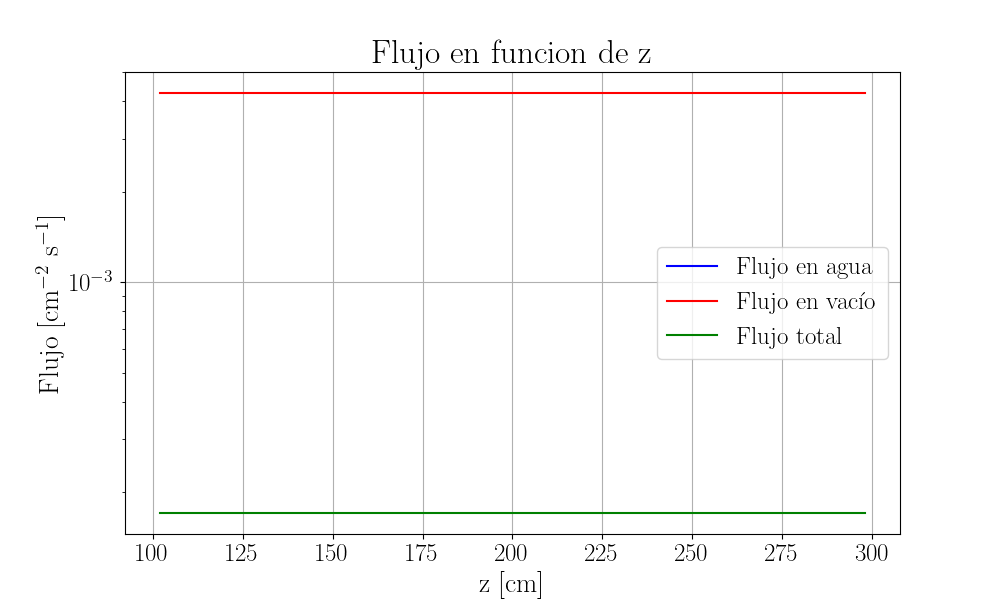

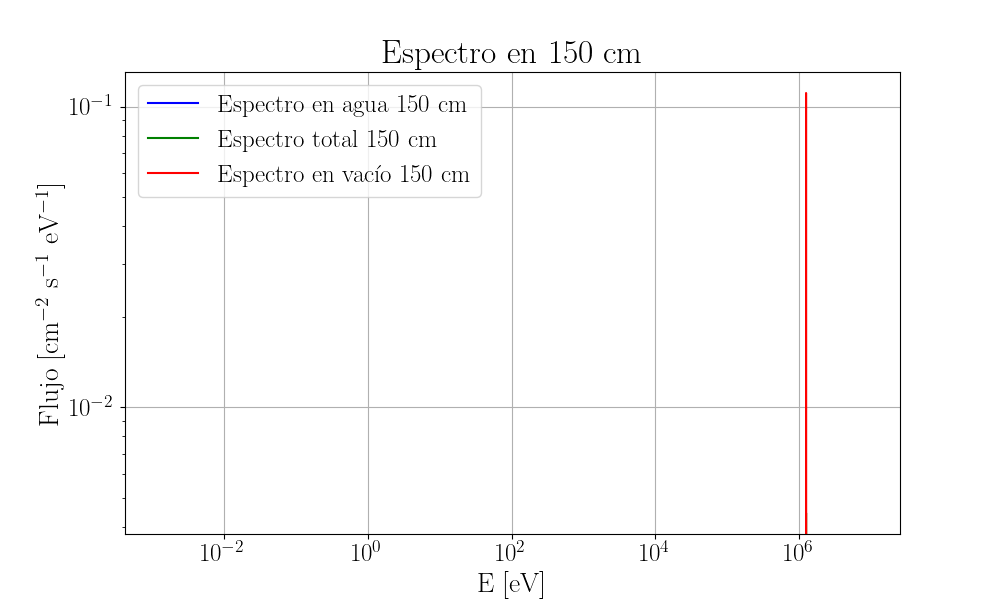

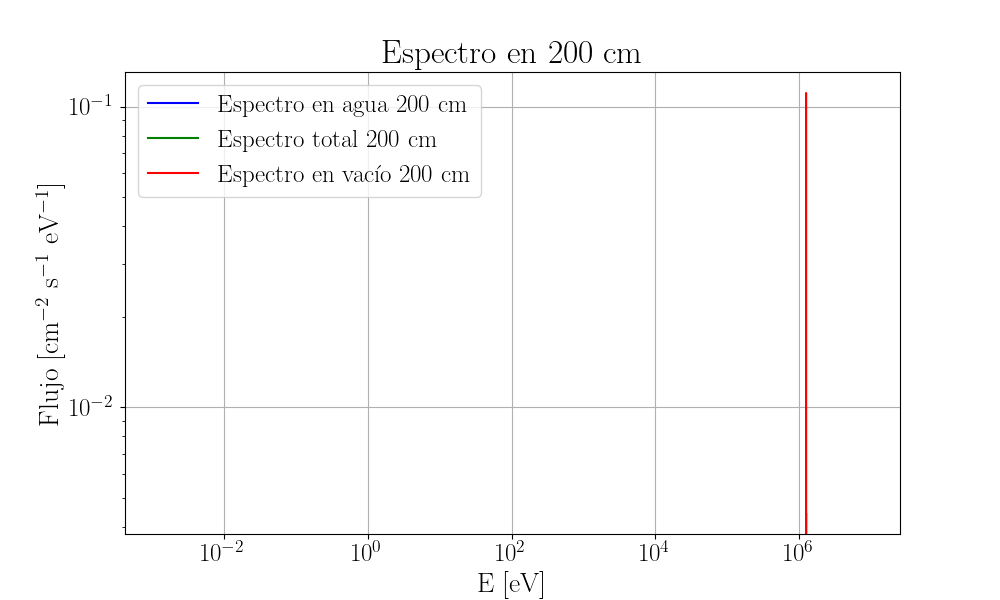

In [4]:
%matplotlib widget
df_flux_total = tally_flux_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name="flux_total",
)
df_flux_vacio = tally_flux_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name="flux_vacio",
)
df_flux_agua = get_tally_agua(df_flux_total, df_flux_vacio)
plot_flux(
    df_flux_agua,
    df_flux_vacio,
    df_flux_total,
)


df_espectro_total_150cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_total_{sim_1.z_for_spectral_tally[0]}cm",
)
df_espectro_vacio_150cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_vacio_{sim_1.z_for_spectral_tally[0]}cm",
)
df_espectro_agua_150cm = get_tally_agua(
    df_espectro_total_150cm, df_espectro_vacio_150cm
)
plot_espectro(
    df_espectro_agua_150cm,
    df_espectro_vacio_150cm,
    df_espectro_total_150cm,
    z=sim_1.z_for_spectral_tally[0],
)


df_espectro_total_200cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_total_{sim_1.z_for_spectral_tally[1]}cm",
)
df_espectro_vacio_200cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_vacio_{sim_1.z_for_spectral_tally[1]}cm",
)
df_espectro_agua_200cm = get_tally_agua(
    df_espectro_total_200cm, df_espectro_vacio_200cm
)
plot_espectro(
    df_espectro_agua_200cm,
    df_espectro_vacio_200cm,
    df_espectro_total_200cm,
    z=sim_1.z_for_spectral_tally[1],
)

In [5]:
import kdsource as kds

# surface = kds.SurfaceSourceFile("/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/sim_1_WW/trackfile_1_WW.h5")
surface = kds.SurfaceSourceFile(
    "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/sim_1/trackfile_1.h5"
)._df

Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/sim_1/trackfile_1.h5: 1000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 


# Resampleo en z=200cm

In [ ]:
csam_1_WW = SamplingConfig(
    columns_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[500] * 5,
    macro_bins=[10, 8, 8, 7],
    binning_type="equal_bins",
    user_defined_edges=[
        [2.995732273553991 + 1e-9],
        None,
        [-1.5, 1.5],
        [-1.5, 1.5],
        [1 - 1e-9],
        None,
    ],
    folder=path+"/sim_1_WW_sampling/",
    surface_track_path=cs_1_WW.folder + cs_1_WW.trackfile_name,
    output_name="source.xml",
    num_resampling=1000000,
)

generate_xml(csam_1_WW, cs_1_WW)    

In [ ]:
resample(path, csam_1_WW, cs_1_WW)